Dataset Shape: (891, 12)



Missing values after handling:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64











Explained Variance Ratio:
Principal Component 1: 0.26512593056920575
Principal Component 2: 0.2449438761869308




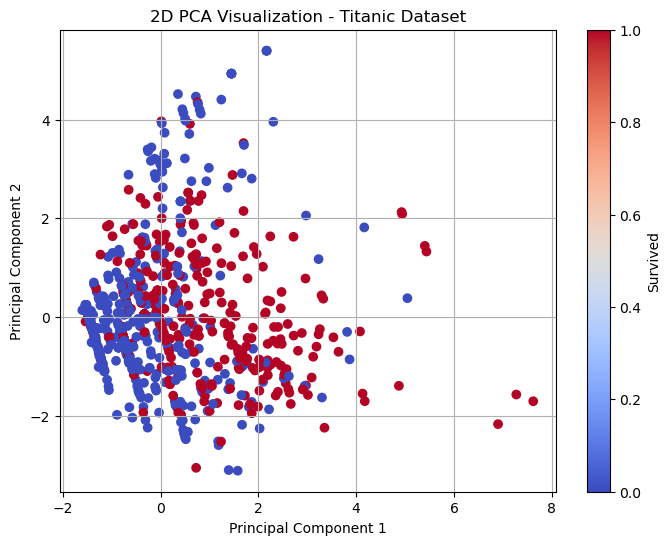

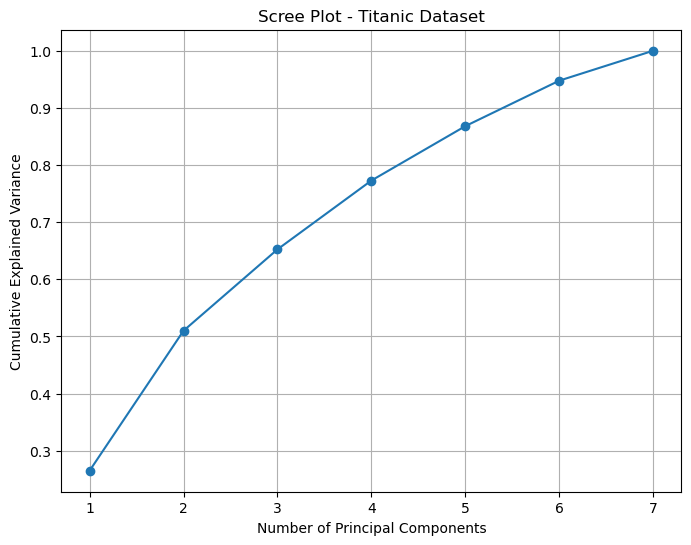

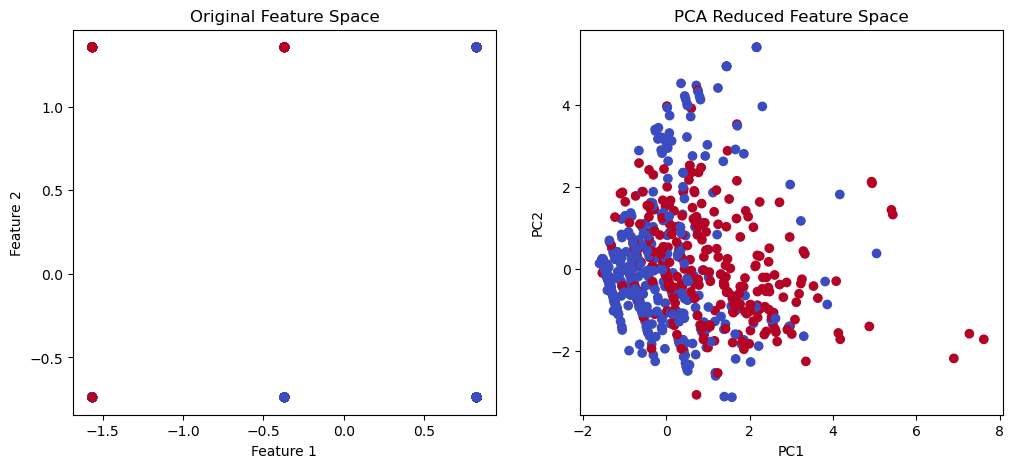

In [29]:
# Experiment - 3 
# In-lab 
# Write Python programs to:
# •	Load the Iris or Wine dataset
# •	Apply standardization using StandardScaler
# •	Apply normalization using MinMaxScaler
# •	Implement PCA to reduce dimensions to 2 components
# •	Calculate and print explained variance ratio for each component
# •	Visualize data in 2D using the first two principal components
# •	Plot scree plot showing cumulative explained variance
# •	Compare original vs PCA-transformed data visualization


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D

# •	Load the Iris or Wine dataset



# ==========================================
# Experiment - 3 (In-Lab)
# Feature Scaling and PCA on Titanic Dataset
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# ------------------------------------------------
# 1. Load the Titanic Dataset
# ------------------------------------------------
df = pd.read_csv("C:/Users/User/Downloads/Titanic-Dataset.csv")

print("Dataset Shape:", df.shape)
print("\n")

# ------------------------------------------------
# 2. Data Preprocessing
# ------------------------------------------------
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

print("\nMissing values after handling:")
print(df.isnull().sum())
print("\n")


# ------------------------------------------------
# 3. Separate Features and Target
# ------------------------------------------------
X = df.drop('Survived', axis=1)
y = df['Survived']
print("\n")

# ------------------------------------------------
# 4. Apply Standardization using StandardScaler
# ------------------------------------------------
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print("\n")


# ------------------------------------------------
# 5. Apply Normalization using MinMaxScaler
# ------------------------------------------------
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)
print("\n")


# ------------------------------------------------
# 6. Implement PCA (2 Components)
# ------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
print("\n")


# ------------------------------------------------
# 7. Explained Variance Ratio
# ------------------------------------------------
print("\nExplained Variance Ratio:")
print("Principal Component 1:", pca.explained_variance_ratio_[0])
print("Principal Component 2:", pca.explained_variance_ratio_[1])
print("\n")


# ------------------------------------------------
# 8. 2D Visualization using PCA
# ------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization - Titanic Dataset")
plt.colorbar(label="Survived")
plt.grid()
plt.show()
print("\n")


# ------------------------------------------------
# 9. Scree Plot (Cumulative Explained Variance)
# ------------------------------------------------
pca_full = PCA()
pca_full.fit(X_standardized)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1),
         cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - Titanic Dataset")
plt.grid()
plt.show()
print("\n")


# ------------------------------------------------
# 10. Original vs PCA-Transformed Visualization
# ------------------------------------------------
plt.figure(figsize=(12,5))

# Original Feature Space
plt.subplot(1,2,1)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=y, cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Feature Space")

# PCA Reduced Feature Space
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Reduced Feature Space")

plt.show()
print("\n")


# ------------------------------------------------
# End of Experiment
# ------------------------------------------------
